In [1]:
from SubTempNet import *

%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

# Stochastic Block Model

In [10]:
n = [50,50]
p = [[0.001,0],[0,0.00005]]
t = 30000
name = "data/SBM/SBM_ud_n"+str(n[0])+"-"+str(n[1])+"_p"+str(p[0][0])+"-"+str(p[1][1])+"_T"+str(t)
A = [nx.stochastic_block_model(n,p,seed = None) for i in range(t)]
if len(A[0].edges()) ==0:
    u,v = np.random.choice(range(50),2,replace = False )
    A[0].add_edge(u,v)
if len(A[-1].edges()) ==0:
    u,v = np.random.choice(range(50),2,replace = False )
    A[-1].add_edge(u,v)
write_snapshotlist_to_edgelist(snapshotlist, filename, separator='\t')
snapshotlist_to_temporal_edgelist(A, "data/" + name +".edges")

KeyboardInterrupt: 

In [7]:
filepath ="data/SBM/SBM_ud_n50-50_p001-00005_T15000.edges"
objname = "SBM_n50-50_p001-00005"
STN= SubTempNet(filepath,objname,directed= False, init = True)

[1, 8, 9, 10, 11, 12, 14, 15, 17, 19, 22, 25, 28, 31, 35, 39, 44, 49, 55, 61, 69, 77, 86, 97, 108, 121, 136, 152, 170, 191, 214, 239, 268, 300, 336, 376, 421, 471, 528, 591, 662, 741, 829, 929, 1040, 1164, 1303, 1459, 1634, 1829, 2048]


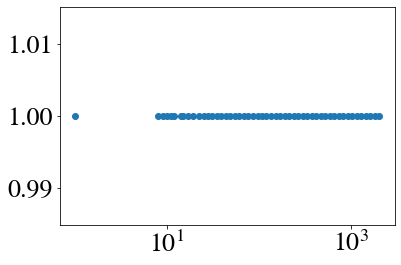

In [8]:
num = 50
T = sorted(list(set(list(np.logspace(np.log10(STN["T"]),np.log10(8.1), num, dtype = int)))),reverse = True)
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [9]:
STN.run(*T,  maxsamp = 30, minsamp = 5)

Done with samplelengths  [1, 8, 9, 10, 11, 12, 14, 15, 17, 19, 22, 25, 28, 31, 35, 39, 44, 49, 55, 61, 69, 77]
Analyzing sample number 28 for samplelength  86 and  2 slices


KeyboardInterrupt: 

In [ ]:
STN.plot_PA(normalize=True)
STN.plot_LCC(normalize=True)
STN.plot_cA0AT()
STN.plot_cA0AL(2,4,6,8)